# Importing the required modules

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.model_selection import train_test_split as tts

In [3]:
df = pd.read_csv('RAT01.csv')
df1 = pd.read_csv('RAT02.csv')
df2 = pd.read_csv('RAT03.csv')
df3 = pd.read_csv('RAT04.csv')
df4 = pd.read_csv('RAT05.csv')
df5 = pd.read_csv('RAT06.csv')
df6 = pd.read_csv('RAT07.csv')
df7 = pd.read_csv('RAT08.csv')
for i in (df.columns.values):
    print(type(i))


<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


In [4]:
df.head()
df.shape


(89733, 7)

In [5]:
import pandas as pd
dfs = []  # List to store the DataFrames

for i in range(1, 9):
   file_name = f'RAT0{i}.csv'  # Construct the file name
   df = pd.read_csv(file_name)  # Read the CSV file into a DataFrame
   df['Target'] = file_name[:-4]# Add an 'Target' column with values as filename without extection
   if i == 1 :
      if  '147.32.83.234' in df['Source']  or  '147.32.83.234' in df['Destination'] :
         df['Malious'] = 1
      else:
         df['Malious']=0
   if i == 2:
      if  '147.32.83.253' in df['Source'] or  '147.32.83.253' in df['Destination'] :
         df['Malious'] = 1
      else:
         df['Malious']=0
   if i == 3:
      if  '35.201.97.85' in df['Source'] or  '35.201.97.85' in df['Destination'] :
         df['Malious'] = 1
      else:
         df['Malious']=0
   if i == 4:
      if  '147.32.83.181' in df['Source'] or  '147.32.83.181' in df['Destination'] :
         df['Malious'] = 1
      else:
         df['Malious']=0
   if i == 5 :
      if  '147.32.83.234 ' in df['Source'] or  '147.32.83.234' in df['Destination'] :
         df['Malious'] = 1
      else:
         df['Malious']=0
   if i == 6 :
      if  '192.168.131.1' in df['Source'] or  '192.168.131.1' in df['Destination'] :
         df['Malious'] = 1
      else: 
         df['Malious']=0
   if i == 7 :
      if  '147.32.83.230' in df['Source'] or  '147.32.83.230' in df['Destination']:
         df['Malious'] = 1
      else:
         df['Malious']=0
   if i == 8 :
      if  '147.32.83.157' in df['Source'] or  '147.32.83.157' in df['Destination']:
         df['Malious'] = 1 
      else:
         df['Malious']=0   
   dfs.append(df)  # Append the DataFrame to the list
df_merge = pd.concat(dfs,ignore_index=True)
# Print the first few rows of the DataFrame where 'Malicious' is equal to 1
df_merge['Info'].head()

# dfs =[df,df1,df2,df3,df4,df5,df6,df7]
# df_merge = pd.concat(dfs,ignore_index=True)

0    Standard query 0x04da A infinitedata-pa.google...
1    45949  >  853 [SYN] Seq=0 Win=65535 Len=0 MSS=...
2    853  >  45949 [SYN, ACK] Seq=0 Ack=1 Win=60192...
3    Standard query response 0x04da A infinitedata-...
4    45949  >  853 [ACK] Seq=1 Ack=1 Win=88064 Len=...
Name: Info, dtype: object

In [6]:
df_merge['Info'][100000]
import re
Sourceport_ips = []
Destination_ips = []
for i in range(len(df_merge['Info'])):
    text = str(df_merge['Info'][i])
    # Use a regular expression to extract the desired part
    match = re.search(r'(\d+\s{2}\>\s{2}\d+)', text)

    if match:
        result = match.group(1)
        result=result.split('  ')
        if '>' in result:
            result.remove('>')
        t = int(result[0])
        Sourceport_ips.append(t)
        t1 = int(result[1])
        Destination_ips.append(t1)
        #This is a Source ip and Source port number tuple
    else:
        Sourceport_ips.append(0)
        Destination_ips.append(0)

In [7]:
df_merge['Source_port'] = Sourceport_ips
df_merge['Destination_port'] = Destination_ips
print(type(df_merge['Destination_port'][0]))
df_merge['Above_1024'] = np.where((df_merge['Source_port'] > 1024) | (df_merge['Destination_port'] > 1024), 1, 0)
df_merge.head()

<class 'numpy.int64'>


,No.,Time,Source,Destination,Protocol,Length,Info,Target,Malious,Source_port,Destination_port,Above_1024
0,1,0.000000,10.8.0.61,8.8.8.8,DNS,76,Standard query 0x04da A infinitedata-pa.google...,RAT01,0,0,0,0
1,2,0.016637,10.8.0.61,8.8.8.8,TCP,60,45949 > 853 [SYN] Seq=0 Win=65535 Len=0 MSS=...,RAT01,0,45949,853,1
2,3,0.017375,8.8.8.8,10.8.0.61,TCP,60,"853 > 45949 [SYN, ACK] Seq=0 Ack=1 Win=60192...",RAT01,0,853,45949,1
3,4,0.017912,8.8.8.8,10.8.0.61,DNS,92,Standard query response 0x04da A infinitedata-...,RAT01,0,0,0,0
4,5,0.020687,10.8.0.61,8.8.8.8,TCP,52,45949 > 853 [ACK] Seq=1 Ack=1 Win=88064 Len=...,RAT01,0,45949,853,1


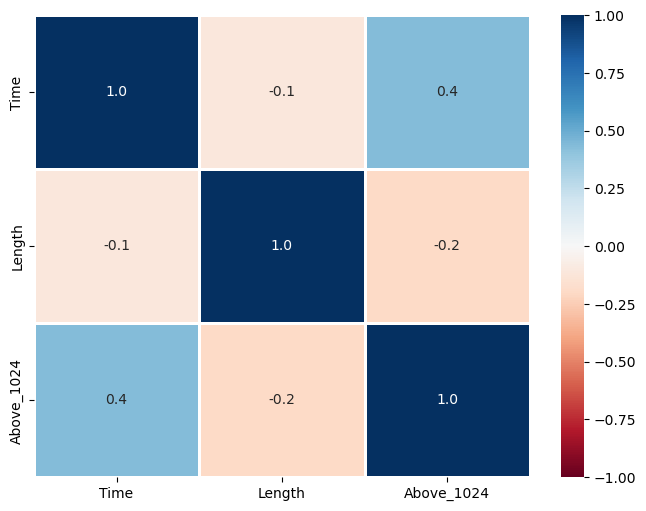

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select the columns of interest from your DataFrame
selected_columns = df_merge[['Time', 'Length','Above_1024']]

# ['No.', 'Time', 'Source', 'Destination', 'Protocol', 'Length', 'Info']
# Calculate the correlation matrix for these selected columns
correlation_matrix = selected_columns.corr()

# Create a figure with the desired size
plt.figure(figsize=(8, 6))

# Create the heatmap
sns.heatmap(correlation_matrix, cmap='RdBu', center=0, vmin=-1, vmax=1, annot=True, fmt='.1f', linewidths=2)

# Show the heatmap
plt.show()


In [9]:
df_merge.head()

,No.,Time,Source,Destination,Protocol,Length,Info,Target,Malious,Source_port,Destination_port,Above_1024
0,1,0.000000,10.8.0.61,8.8.8.8,DNS,76,Standard query 0x04da A infinitedata-pa.google...,RAT01,0,0,0,0
1,2,0.016637,10.8.0.61,8.8.8.8,TCP,60,45949 > 853 [SYN] Seq=0 Win=65535 Len=0 MSS=...,RAT01,0,45949,853,1
2,3,0.017375,8.8.8.8,10.8.0.61,TCP,60,"853 > 45949 [SYN, ACK] Seq=0 Ack=1 Win=60192...",RAT01,0,853,45949,1
3,4,0.017912,8.8.8.8,10.8.0.61,DNS,92,Standard query response 0x04da A infinitedata-...,RAT01,0,0,0,0
4,5,0.020687,10.8.0.61,8.8.8.8,TCP,52,45949 > 853 [ACK] Seq=1 Ack=1 Win=88064 Len=...,RAT01,0,45949,853,1


In [51]:
Y = df_merge['Malious']

X = df_merge.drop("Target",axis=1)
X.shape

(563334, 11)

In [52]:
df_merge.head()

,No.,Time,Source,Destination,Protocol,Length,Info,Target,Malious,Source_port,Destination_port,Above_1024
0,1,0.000000,10.8.0.61,8.8.8.8,DNS,76,Standard query 0x04da A infinitedata-pa.google...,RAT01,0,0,0,0
1,2,0.016637,10.8.0.61,8.8.8.8,TCP,60,45949 > 853 [SYN] Seq=0 Win=65535 Len=0 MSS=...,RAT01,0,45949,853,1
2,3,0.017375,8.8.8.8,10.8.0.61,TCP,60,"853 > 45949 [SYN, ACK] Seq=0 Ack=1 Win=60192...",RAT01,0,853,45949,1
3,4,0.017912,8.8.8.8,10.8.0.61,DNS,92,Standard query response 0x04da A infinitedata-...,RAT01,0,0,0,0
4,5,0.020687,10.8.0.61,8.8.8.8,TCP,52,45949 > 853 [ACK] Seq=1 Ack=1 Win=88064 Len=...,RAT01,0,45949,853,1


In [53]:
X.Source.value_counts().sort_values(ascending=False).head(10)

Source
10.8.0.93                          112298
157.240.30.27                      103254
147.32.83.181                       50035
10.8.0.61                           44945
157.240.30.63                       34676
10.8.0.249                          33736
216.58.201.99                       24371
2a03:2880:f03d:1c:face:b00c:0:3     20690
10.8.0.57                           20332
10.8.0.117                          16643
Name: count, dtype: int64

In [54]:
top_10 = [x for x in X.Source.value_counts().sort_values(ascending=False).head(10).index]
top_10

['10.8.0.93',
 '157.240.30.27',
 '147.32.83.181',
 '10.8.0.61',
 '157.240.30.63',
 '10.8.0.249',
 '216.58.201.99',
 '2a03:2880:f03d:1c:face:b00c:0:3',
 '10.8.0.57',
 '10.8.0.117']

In [55]:
for label in top_10:
    X[label]=np.where(X['Source']==label,1,0)
X[['Source']+top_10].head(5)

,Source,10.8.0.93,157.240.30.27,147.32.83.181,10.8.0.61,157.240.30.63,10.8.0.249,216.58.201.99,2a03:2880:f03d:1c:face:b00c:0:3,10.8.0.57,10.8.0.117
0,10.8.0.61,0,0,0,1,0,0,0,0,0,0
1,10.8.0.61,0,0,0,1,0,0,0,0,0,0
2,8.8.8.8,0,0,0,0,0,0,0,0,0,0
3,8.8.8.8,0,0,0,0,0,0,0,0,0,0
4,10.8.0.61,0,0,0,1,0,0,0,0,0,0


In [56]:
top_10 = [x for x in X.Destination.value_counts().sort_values(ascending=False).head(10).index]
top_10                                                                                  

['147.32.83.181',
 '10.8.0.93',
 '10.8.0.249',
 '10.8.0.61',
 '10.8.0.57',
 '147.32.83.234',
 '2001:718:2:903:b877:48ae:9531:fbfc',
 '10.8.0.117',
 '157.240.30.27',
 '10.8.0.137']

In [57]:
for label in top_10:
    X[label]=np.where(X['Destination']==label,1,0)
X[['Destination']+top_10].head(5)

,Destination,147.32.83.181,10.8.0.93,10.8.0.249,10.8.0.61,10.8.0.57,147.32.83.234,2001:718:2:903:b877:48ae:9531:fbfc,10.8.0.117,157.240.30.27,10.8.0.137
0,8.8.8.8,0,0,0,0,0,0,0,0,0,0
1,8.8.8.8,0,0,0,0,0,0,0,0,0,0
2,10.8.0.61,0,0,0,1,0,0,0,0,0,0
3,10.8.0.61,0,0,0,1,0,0,0,0,0,0
4,8.8.8.8,0,0,0,0,0,0,0,0,0,0


In [58]:
top_10 = [x for x in X.Protocol.value_counts().sort_values(ascending=False).head(10).index]
top_10

['TCP',
 'QUIC',
 'TLSv1.3',
 'TLSv1.2',
 'GQUIC',
 'DNS',
 'ICMP',
 'IRC',
 'ICMPv6',
 'WebSocket']

In [59]:
for label in top_10:
    X[label]=np.where(X['Protocol']==label,1,0)
X[['Protocol']+top_10].head(5)

,Protocol,TCP,QUIC,TLSv1.3,TLSv1.2,GQUIC,DNS,ICMP,IRC,ICMPv6,WebSocket
0,DNS,0,0,0,0,0,1,0,0,0,0
1,TCP,1,0,0,0,0,0,0,0,0,0
2,TCP,1,0,0,0,0,0,0,0,0,0
3,DNS,0,0,0,0,0,1,0,0,0,0
4,TCP,1,0,0,0,0,0,0,0,0,0


In [60]:
X.drop(['Source','Destination','Protocol','Info'],axis=1,inplace=True)
X.shape

(563334, 30)

In [61]:
df_merge.head()

,No.,Time,Source,Destination,Protocol,Length,Info,Target,Malious,Source_port,Destination_port,Above_1024
0,1,0.000000,10.8.0.61,8.8.8.8,DNS,76,Standard query 0x04da A infinitedata-pa.google...,RAT01,0,0,0,0
1,2,0.016637,10.8.0.61,8.8.8.8,TCP,60,45949 > 853 [SYN] Seq=0 Win=65535 Len=0 MSS=...,RAT01,0,45949,853,1
2,3,0.017375,8.8.8.8,10.8.0.61,TCP,60,"853 > 45949 [SYN, ACK] Seq=0 Ack=1 Win=60192...",RAT01,0,853,45949,1
3,4,0.017912,8.8.8.8,10.8.0.61,DNS,92,Standard query response 0x04da A infinitedata-...,RAT01,0,0,0,0
4,5,0.020687,10.8.0.61,8.8.8.8,TCP,52,45949 > 853 [ACK] Seq=1 Ack=1 Win=88064 Len=...,RAT01,0,45949,853,1


In [101]:
from sklearn.model_selection import train_test_split as tts
x_train,x_test,y_train,y_test = tts(X,Y,test_size=.3,random_state=1)
x_train

,No.,Time,Length,Malious,Source_port,Destination_port,Above_1024,10.8.0.93,157.240.30.27,147.32.83.181,...,TCP,QUIC,TLSv1.3,TLSv1.2,GQUIC,DNS,ICMP,IRC,ICMPv6,WebSocket
557397,42471,175.425611,83,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
193851,40814,254.574128,1401,0,443,42881,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
277698,33209,242.417179,40,0,39140,443,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
547701,32775,67.061160,1400,0,443,48892,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
378200,133711,6478.267533,1400,0,41714,8000,1,0,0,1,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371403,126914,6474.430126,52,0,8000,41714,1,1,0,0,...,1,0,0,0,0,0,0,0,0,0
491263,17090,109.810933,1294,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
470924,31451,1964.326620,654,0,36280,1337,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
491755,17582,110.435982,508,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [106]:
# Applying SMOTE to our data and checking the class counts
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=1)
x_train_balanced, y_train_balanced = smote.fit_resample(x_train, y_train)
print(x_train_balanced.shape)


ValueError: The target 'y' needs to have more than 1 class. Got 1 class instead

In [72]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [73]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=20 , max_depth=15)
clf.fit(x_train,y_train)

RandomForestClassifier(max_depth=15, n_estimators=20)

In [74]:
clf.score(x_train,y_train)

1.0

In [75]:
from sklearn.metrics import classification_report
y_pred_dt = clf.predict(x_test)
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    169001

    accuracy                           1.00    169001
   macro avg       1.00      1.00      1.00    169001
weighted avg       1.00      1.00      1.00    169001



# Prediction

In [80]:
import random

# Generate a list of 26 random numbers between -1 and 1
random_numbers = [random.uniform(-1, 1) for _ in range(30)]

# Print the list
print(random_numbers)

print(clf.predict([random_numbers])[0])

[-0.4230700737576707, -0.3834959566518432, -0.3467533439833268, 0.5203160899928276, -0.14989349444315736, -0.23661664448676611, 0.857383606251024, -0.02252503571228459, -0.8106473186748626, 0.6893725187866495, 0.7166549294757136, -0.9229764806891798, -0.42822884416336726, 0.4580912215629165, 0.9175036541420996, -0.6858068708021585, 0.4784582247983329, -0.17603262950437726, -0.19848610783682208, 0.5224098103383101, -0.02970709290617668, 0.9416555802118878, -0.6261963480937147, 0.9298798249424929, 0.8429909648791387, 0.46148754396164926, -0.4857872568063526, -0.22641815726626024, -0.42608003921114834, -0.9287796431178197]
0


In [82]:
from sklearn.metrics import confusion_matrix
cmat = confusion_matrix(y_test,y_pred_dt) 

array([1.])

# Model accuracy 

In [90]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=20 , max_depth=15)
clf.fit(x_train,y_train)

RandomForestClassifier(max_depth=15, n_estimators=20)

In [91]:
acc=clf.score(x_test,y_test)
print(acc)

1.0


In [89]:
acc = round(acc*100,2)
print(f'Accuracy of Random Forest classifier on training set: {acc} %')

Accuracy of Random Forest classifier on training set: 100.0 %


# Decision Tree

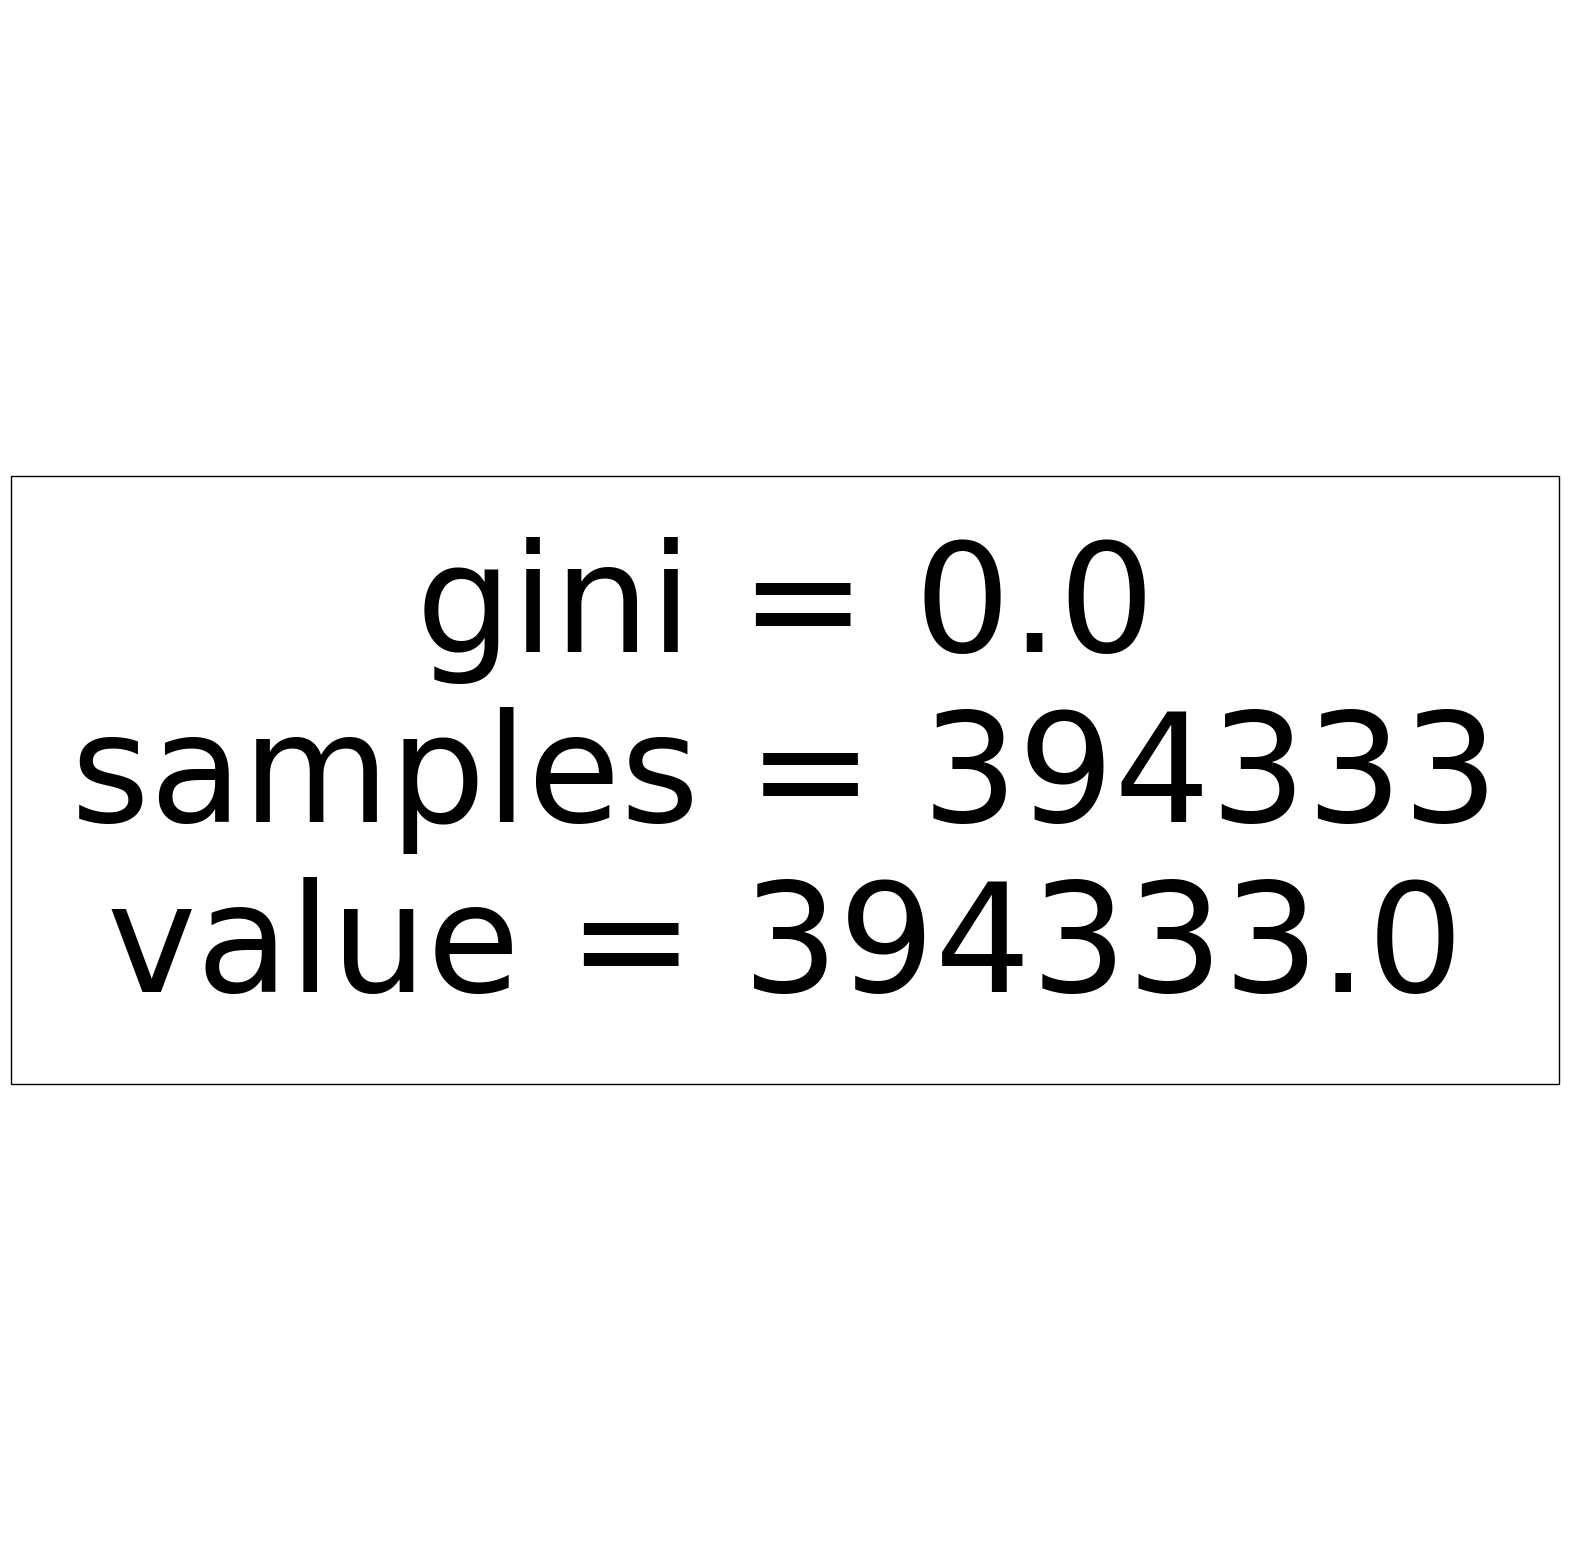

In [93]:
from sklearn import tree
dec = tree.DecisionTreeClassifier(max_depth=8)
dec = dec.fit(x_train,y_train)
acc = dec.score(x_train,y_train)
plt.figure(figsize=(20,20))
tree.plot_tree(dec,filled=True)
plt.show()

In [94]:
print(f'Accuracy of Decision Tree classifier on training set: {round(acc*100,2)} %')

Accuracy of Decision Tree classifier on training set: 100.0 %


# Saving model for future use

In [ ]:
import joblib

model_filename = 'Random_forest_model.pkl'
joblib.dump(clf, model_filename)
